### Problem 1: 
#### There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance
Dataset Link https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import datetime

In [3]:
#Read CSV (comma-separated) file into DataFrame
data = pd.read_csv('data_stocks.csv')

In [4]:
data.sample(n=10)  #Returns the first 5 rows of data dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
6573,1493232420,2394.8601,46.810,144.0443,132.880,78.1600,105.0931,90.33,62.3300,121.8401,...,101.260,120.140,44.9846,42.200,81.7565,7.115,51.6400,66.0100,124.9900,55.5300
9550,1494260160,2395.5000,45.005,152.4939,134.630,75.9900,98.5200,93.23,50.8292,123.1400,...,95.320,120.930,45.0600,42.000,82.5250,7.055,52.4300,69.1500,116.0600,58.3750
28266,1500315840,2459.6799,54.040,149.5902,146.560,81.3932,101.6100,107.20,51.8499,126.5100,...,102.840,94.150,46.0500,45.270,81.2700,29.280,56.7169,73.6664,132.4336,63.2499
3549,1492437600,2336.1399,43.670,141.2500,129.975,76.5400,101.8100,85.61,58.7900,117.8200,...,87.890,118.690,45.0800,40.260,81.5600,7.010,48.8600,63.9500,119.8800,53.5000
6113,1493141880,2388.8701,46.530,144.6399,133.600,79.3364,105.0100,90.26,61.4100,121.1400,...,92.080,120.360,44.9100,41.600,81.6700,7.050,51.8000,66.1500,124.4700,54.8900
38608,1503499740,2447.2200,44.180,160.0300,151.160,78.7200,103.0200,111.18,45.7300,136.2350,...,98.170,100.150,49.2150,43.940,76.7875,31.625,59.8600,76.3400,112.3511,61.4650
40445,1504034520,2448.2600,44.470,162.8600,152.610,79.6800,105.2600,111.52,45.7400,138.7900,...,96.810,97.900,49.5450,41.780,76.3850,32.265,61.1150,76.0800,113.0600,61.6050
26127,1499700000,2428.7400,52.350,144.8655,142.780,77.9000,104.6200,103.21,49.5507,122.7900,...,101.225,91.780,45.8050,45.060,80.3550,28.720,54.6100,73.3200,126.8700,62.5000
18470,1497020580,2444.9299,51.700,154.6299,143.070,82.3500,101.0500,110.99,48.9100,105.3100,...,100.070,99.525,47.2700,42.280,81.0526,6.990,53.8500,73.7900,125.4800,62.9900
40472,1504036140,2447.0100,44.640,163.0475,152.390,79.4950,105.1700,111.17,45.7550,138.6800,...,96.660,98.160,49.5600,41.775,76.3400,32.255,61.1000,76.1000,112.9647,61.4950


In [5]:
data.describe() #The summary statistics of the data dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [6]:
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [7]:
data.shape #Return a tuple representing the dimensionality of data DataFrame.

(41266, 502)

In [8]:
data.isnull().values.any() #Check for any NA’s in the dataframe.

False

#### Data Visualization

In [9]:
data_new = data.copy() #Making a copy of the data dataframe

In [10]:
data_new.drop(['DATE', 'SP500'], axis=1, inplace = True) #Removing the Date and SP500 columns

In [11]:
data_new.head() #Returns the first 5 rows of data dataframe

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [12]:
data_new.shape #Return a tuple representing the dimensionality of data DataFrame.

(41266, 500)

In [13]:
data_new.columns #Return columns of data dataframe.

Index(['NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP',
       'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT',
       'NASDAQ.AMD',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=500)

In [14]:
pca = PCA(n_components=3) #creating principle component analysis

In [15]:
#Fitting the pca object
pca.fit(data_new)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
#Transforming the data_new dataframe
data_new_reduced = pca.transform(data_new)

In [17]:
data_new_reduced.shape #Return a tuple representing the dimensionality of data_new_reduced DataFrame.

(41266, 3)

In [18]:
data_new_reduced[:1].shape #Return a tuple representing the dimensionality of data_new_reduced dataframe's 1st row.

(1, 3)

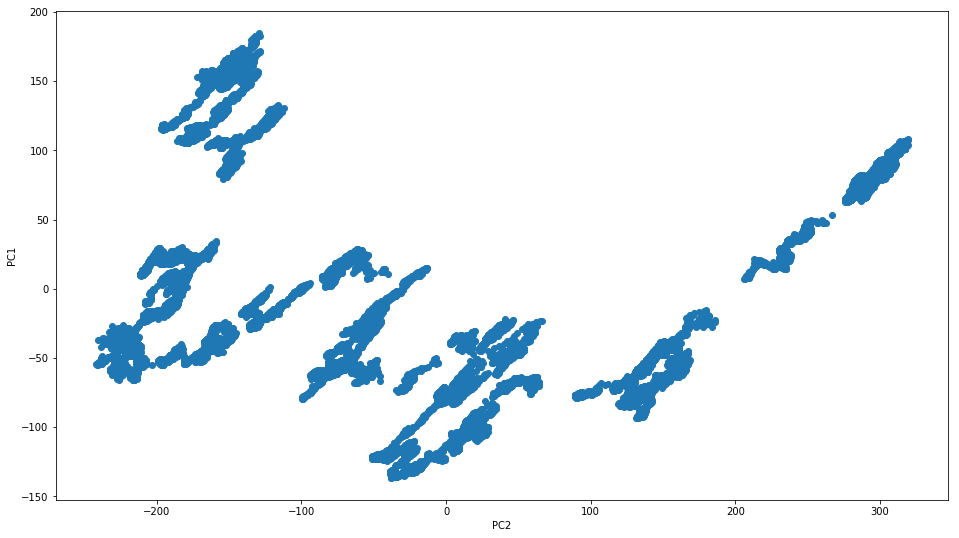

In [19]:

#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(data_new_reduced[:,0],data_new_reduced[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

#### KMeans Clustering

In [20]:
pca.explained_variance_ #Returns explained variance array

array([29552.09265369,  6861.74983656,  3733.21310127])

In [21]:
data_new_reduced #Transformed data_new dataframe

array([[ 306.7014591 ,   83.2240155 ,   60.07857695],
       [ 303.07353165,   79.13615476,   60.77302358],
       [ 301.07978706,   78.29811525,   58.19185706],
       ...,
       [-195.96140814,  118.43969002,  -59.58416424],
       [-195.00245926,  118.98135157,  -59.20880889],
       [-196.53458095,  117.44181957,  -60.4663573 ]])

In [22]:
#Finding k and intertia for KMeans clustering using elbow method
k = []
inertia = []
for i in range(1,20):
    k_means = KMeans(n_clusters = i)
    k_means.fit(data_new_reduced)
    k.append(i)
    inertia.append(k_means.inertia_)

In [23]:
inertia #Inertia List Data

[1656668248.983808,
 696464688.9505396,
 401139261.74254584,
 240947420.63094282,
 119415116.52315402,
 90075099.94494615,
 76643061.64550751,
 63542419.934407316,
 54159044.546098374,
 45718188.038557805,
 37590423.16674271,
 32958610.99951292,
 25103926.10122353,
 22591033.59601754,
 20845450.575810023,
 19355895.084363747,
 17754033.142038908,
 16469305.74216733,
 14856601.020184448]

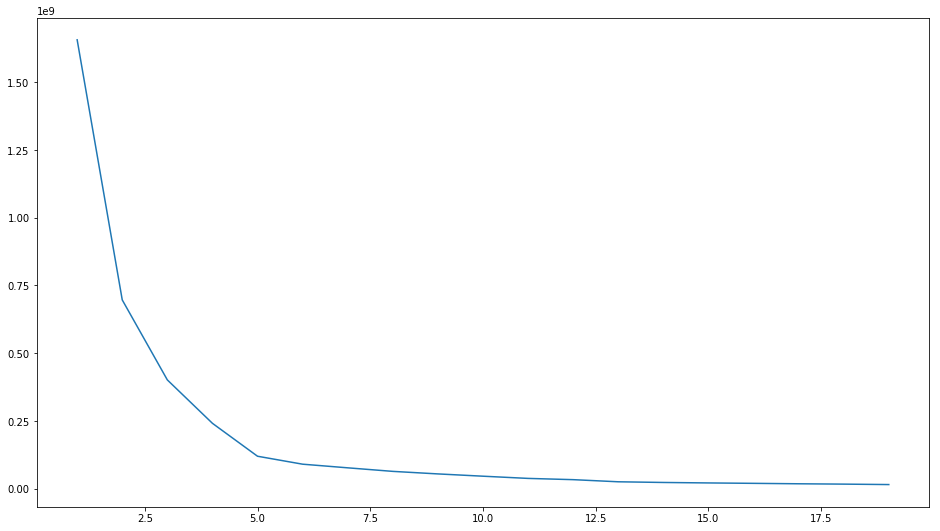

In [24]:
#Plot to find number of clusters (Elbow Method)
plt.figure(figsize=(16,9))
plt.plot(k,inertia)
plt.show()

In [25]:
#Initializing and fitting KMeans
km = KMeans(n_clusters = 5)
km.fit(data_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
#Predicted values using KMeans
y_predict = km.predict(data_new)

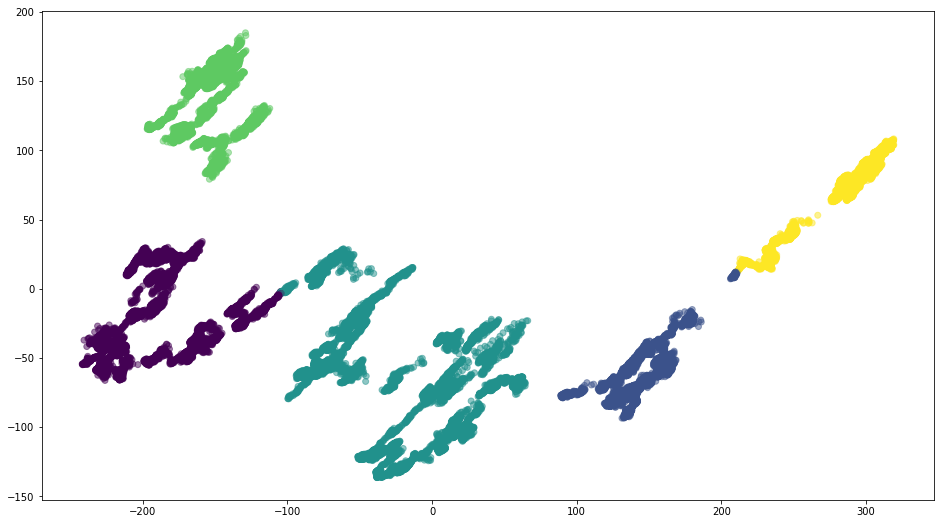

In [27]:
#Scatter Plot
x = data_new_reduced[:,0]
y = data_new_reduced[:,1]
plt.figure(figsize=(16,9))
plt.scatter(x, y, c = y_predict, alpha=0.5)
plt.show()

In [28]:
#Adding 'Y_PREDICT' column in data_new dataframe
data_new['Y_PREDICT'] = y_predict

In [29]:
data_new.head() #Returns the first 5 rows of data_new dataframe

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4


In [30]:
#Returns 'Y_PREDICT' column containing counts of unique values in data_new dataframe.
data_new['Y_PREDICT'].value_counts()

2    12029
0     8905
4     6976
1     6709
3     6647
Name: Y_PREDICT, dtype: int64

In [ ]:
##problem 1

In [31]:
#Read CSV (comma-separated) file into DataFrame
stocks= pd.read_csv('data_stocks.csv')

In [32]:
stocks.head() #Returns the first 5 rows of stocks dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [33]:
#Adding a new column 'NEW_DATE' in stocks dataframe 
stocks['NEW_DATE'] = pd.to_datetime(stocks['DATE'],unit='s')

In [34]:
cols = stocks.columns.tolist() #Creating a list of columns from stocks dataframe

In [35]:
cols = cols[-1:] + cols[:-1] #Making 'NEW_DATE' as first column

In [36]:
cols #cols list data

['NEW_DATE',
 'DATE',
 'SP500',
 'NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NA

In [37]:
#Removing 'DATE' and 'SP500' columns
cols.remove('DATE')
cols.remove('SP500')

In [38]:
stocks.drop(columns=['DATE','SP500'],axis=1,inplace=True) #Removing 'DATE' and 'SP500' from stocks dataframe

In [39]:
stocks.head() #Returns the first 5 rows of stocks dataframe

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,NEW_DATE
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 13:30:00
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 13:31:00
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 13:32:00
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 13:33:00
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 13:34:00


In [40]:
df = stocks[cols] #Creating a df objects which has cols list column data from stocks dataframe

In [41]:
df.head() #Returns the first 5 rows of df dataframe

,NEW_DATE,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [42]:
df.shape #Return a tuple representing the dimensionality of df DataFrame.

(41266, 501)

In [43]:
#Setting NEW_DATE as index 
df.set_index('NEW_DATE',inplace=True)

In [44]:
df.head()  #Returns the first 5 rows of df dataframe

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NEW_DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [45]:
df_transpose = df.transpose() #Creating transpose of the df dataframe

In [46]:
df_transpose.head() #Returns the first 5 rows of df_transpose dataframe

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:51:00,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.72,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.16,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.06,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.71,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.62,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47


In [47]:
#Creating an instance of PCA
pca_new = PCA(n_components=3)

In [48]:
#Fitting and tranforming the df_transpose dataframe
df_transpose_reduced = pca_new.fit_transform(df_transpose)

In [49]:
df_transpose_reduced.shape  #Return a tuple representing the dimensionality of df_transpose_reduced DataFrame.

(500, 3)

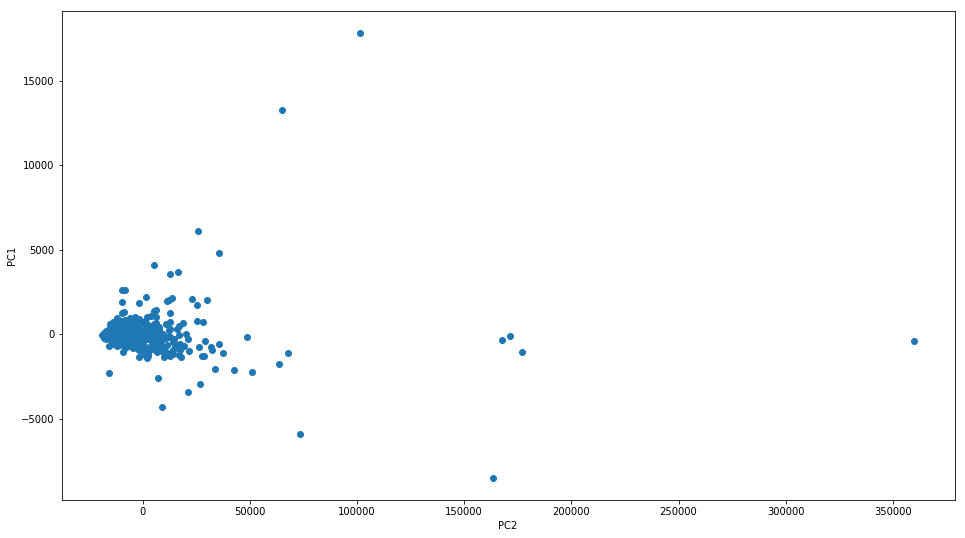

In [50]:
#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(df_transpose_reduced[:,0],df_transpose_reduced[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

In [51]:
#Returns explained variance array
pca_new.explained_variance_

array([6.83663380e+08, 1.88968326e+06, 3.64618121e+05])

In [52]:
#Finding k_new and intertia_new list data for KMeans clustering using elbow method
k_new = []
inertia_new = []
for i in range(2,10):
    km_new=KMeans(n_clusters=i)
    km_new.fit(df_transpose)
    k_new.append(i)
    inertia_new.append(km_new.inertia_)

In [53]:
inertia_new #inertia_new list data

[123006116341.59377,
 70077213281.75235,
 38215217146.89998,
 21196874808.88073,
 13080591570.448448,
 8602418066.634865,
 6386334395.992672,
 4970342004.526426]

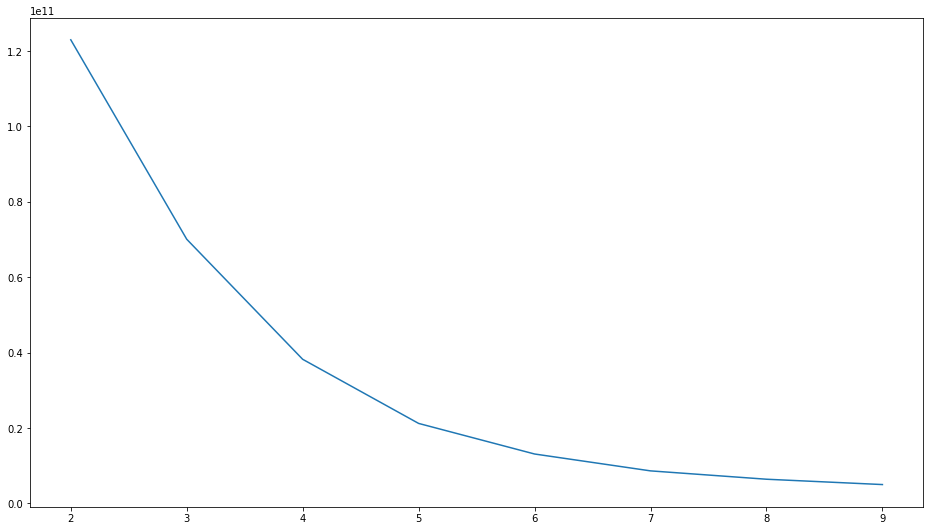

In [54]:
#Plot to find number of clusters (Elbow Method)
plt.figure(figsize=(16,9))
plt.plot(k_new,inertia_new)
plt.show()

In [55]:
#Initializing and fitting KMeans
km = KMeans(n_clusters = 6)
km.fit(df_transpose)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
#Predicted values using KMeans
y_predict_new = km.predict(df_transpose)

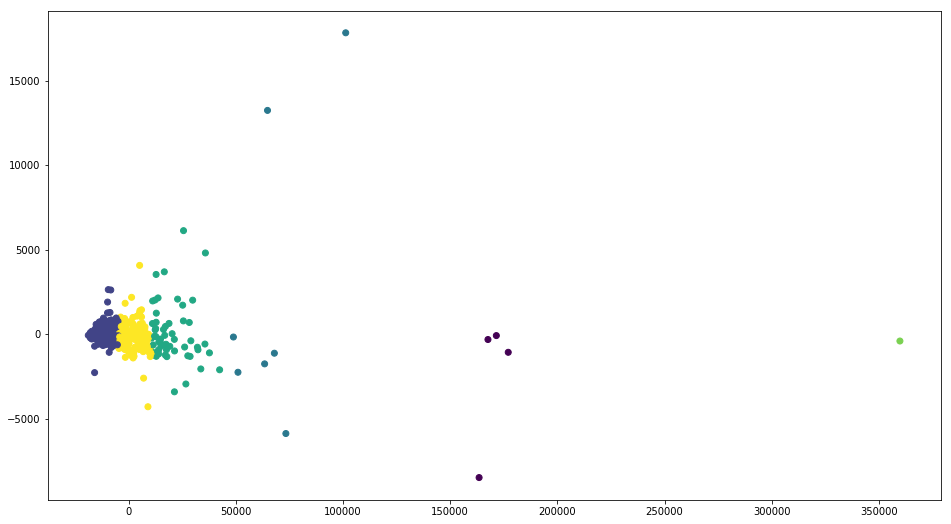

In [57]:
#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(df_transpose_reduced[:,0],df_transpose_reduced[:,1],c=y_predict_new)
plt.show()

In [58]:
#Adding 'y_predict_new' values in df_transpose dataframe creating 'Y_PREDICT' column
df_transpose['Y_PREDICT'] = y_predict_new

In [59]:
#Returns 'Y_PREDICT' column containing counts of unique values in df_transpose dataframe.
df_transpose['Y_PREDICT'].value_counts()

1    263
5    169
3     56
2      7
0      4
4      1
Name: Y_PREDICT, dtype: int64

In [60]:
df_transpose.head() #Returns the first 5 rows of df_transpose dataframe

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74,1
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98,3
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16,5
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69,5
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47,5


In [62]:
#Apparently similar performing stocks of Type-1 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==0]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.31,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.01,979.81,979.445,980.60,0
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.30,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.67,938.13,937.680,939.33,0
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.25,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.47,953.88,953.465,955.24,0
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.61,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.67,1004.04,1003.310,1004.67,0


In [63]:
#Apparently similar performing stocks of Type-2 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==1]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.4700,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.7400,44.7100,44.740,1
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.4100,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.1500,47.1350,47.150,1
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.9600,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.1350,45.0650,45.120,1
NASDAQ.AMD,14.6100,14.7100,14.6400,14.6300,14.6700,14.6800,14.6563,14.6840,14.6942,14.6300,...,12.9900,12.9900,12.9950,12.9850,12.9850,12.9850,12.9700,12.9650,13.000,1
NASDAQ.ATVI,49.8500,49.9400,49.8600,49.9150,49.9150,49.9700,50.0000,50.0200,50.0100,50.0100,...,65.5700,65.5300,65.5600,65.5550,65.5800,65.5900,65.5400,65.4450,65.560,1
NASDAQ.BBBY,39.4300,39.6800,39.6000,39.5700,39.5500,39.5800,39.4900,39.5100,39.4950,39.4433,...,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.3000,29.300,1
NASDAQ.CA,31.7800,31.7800,31.7650,31.8300,31.8300,31.8300,31.7900,31.8100,31.8100,31.8000,...,33.2100,33.2150,33.2200,33.2200,33.2000,33.2100,33.1900,33.1600,33.180,1
NASDAQ.CERN,58.8200,58.4950,58.4700,58.4200,58.6000,58.5200,58.5900,58.6100,58.5500,58.5300,...,67.7200,67.7300,67.6900,67.6700,67.7200,67.7300,67.7200,67.7100,67.780,1
NASDAQ.CHRW,77.7250,77.9400,77.8150,77.9500,78.0500,78.0700,77.9700,78.0700,77.9950,77.9700,...,70.7950,70.7600,70.7200,70.7000,70.6800,70.6400,70.6400,70.5850,70.635,1
NASDAQ.CINF,72.4300,72.0400,72.0550,72.1400,72.2150,72.3000,72.4600,72.5300,72.4800,72.2300,...,76.9400,76.9600,76.9800,76.9518,76.9250,76.9400,76.9100,76.8200,76.840,1


In [64]:
#Apparently similar performing stocks of Type-3 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==2]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.CHTR,330.73,330.73,330.730,330.730,330.7300,330.7300,330.730,330.7300,330.73,330.730,...,398.25,397.970,397.9100,398.14,398.230,398.24,398.330,397.98,398.54,2
NASDAQ.EQIX,400.94,400.40,401.985,401.500,399.7704,399.7704,401.015,400.7900,400.15,399.795,...,468.61,468.575,468.1700,468.27,468.240,468.19,468.120,467.93,468.41,2
NASDAQ.REGN,388.00,390.16,389.890,390.375,390.5144,390.7350,390.105,390.1239,390.74,391.080,...,496.09,496.615,496.6100,496.56,496.600,496.63,496.770,496.59,496.90,2
NYSE.AZO,720.50,719.46,715.010,712.270,708.0000,704.3200,703.500,704.1500,704.15,706.110,...,528.55,528.410,528.5300,528.05,528.135,528.21,528.355,528.14,528.46,2
NYSE.BLK,385.20,385.20,385.200,383.330,384.1050,383.9800,384.041,384.0200,384.05,383.445,...,419.57,419.610,419.6900,419.55,419.290,419.28,419.270,418.94,418.96,2
NYSE.CMG,449.35,449.93,451.680,450.390,450.1000,449.9025,450.810,451.4662,451.27,451.861,...,316.55,316.600,316.4850,316.55,316.490,316.57,316.550,316.32,316.70,2
NYSE.SHW,309.90,311.50,311.500,311.500,311.5000,311.5000,311.500,311.5000,311.50,311.090,...,338.84,338.930,338.9238,338.88,338.680,338.82,338.790,338.54,339.20,2


In [65]:
#Apparently similar performing stocks of Type-4 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==3]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.AAPL,143.680,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.0100,163.8800,163.980,3
NASDAQ.AMGN,164.630,164.6800,164.9050,164.7600,164.8500,164.9225,164.8200,164.7269,164.7050,164.7900,...,177.7400,177.8600,177.8600,177.8650,177.8512,177.7800,177.7600,177.6300,177.820,3
NASDAQ.AVGO,219.110,219.9800,219.3900,219.3000,219.1800,219.4900,219.7200,219.8700,219.8200,219.2701,...,252.0500,252.0700,252.0950,251.7900,251.9150,252.1200,252.0100,251.7600,252.070,3
NASDAQ.BIIB,274.080,273.9900,274.2750,273.5900,273.5400,274.1300,273.8700,274.0500,273.8700,274.3800,...,315.9700,316.0500,316.0200,316.0000,316.2000,316.5800,316.3200,316.3700,316.580,3
NASDAQ.COST,167.740,167.7760,168.0000,168.2000,168.0400,168.0950,168.0825,168.0100,167.9000,168.0440,...,156.7800,156.8800,156.8100,156.8000,156.8000,156.8200,156.8000,156.7300,156.740,3
NASDAQ.FB,141.940,141.8625,141.9100,141.8700,141.7800,141.9286,142.1500,142.0600,142.1500,142.0700,...,171.7550,171.8200,171.7900,171.7700,171.8200,171.8250,171.7500,171.6600,172.000,3
NASDAQ.HSIC,170.220,170.8150,170.8150,170.8150,170.8150,169.9750,169.9700,169.9700,169.9200,169.9200,...,173.7299,173.8300,173.8000,173.8400,173.8800,173.8900,173.8900,173.7100,173.680,3
NASDAQ.IDXX,155.070,155.4837,155.7100,155.5000,155.3500,155.3800,155.3411,155.4265,155.2950,155.4900,...,155.7800,155.7600,155.7800,155.6600,155.5800,155.6300,155.6200,155.3700,155.430,3
NASDAQ.ILMN,171.000,171.2950,171.0540,170.8200,170.8384,170.7150,171.3700,171.2700,170.9300,170.7700,...,204.0200,204.1400,204.1150,204.1000,204.1600,204.1900,204.2300,204.0700,204.460,3
NASDAQ.LRCX,128.530,128.6500,128.3100,128.2101,128.2200,128.5102,128.4301,128.4300,128.3050,128.2500,...,165.8200,165.8900,165.8800,165.7200,165.7800,165.9200,165.9100,165.7700,165.980,3


In [66]:
#Apparently similar performing stocks of Type-5 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==4]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.PCLN,1776.26,1779.4606,1777.55,1776.4301,1774.08,1775.0,1776.585,1777.01,1776.03,1775.5736,...,1850.46,1850.8,1851.52,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,4


In [67]:
#Apparently similar performing stocks of Type-6 are following:
df_transpose.loc[df_transpose['Y_PREDICT']==5]

NEW_DATE,2017-04-03 13:30:00,2017-04-03 13:31:00,2017-04-03 13:32:00,2017-04-03 13:33:00,2017-04-03 13:34:00,2017-04-03 13:35:00,2017-04-03 13:36:00,2017-04-03 13:37:00,2017-04-03 13:38:00,2017-04-03 13:39:00,...,2017-08-31 19:52:00,2017-08-31 19:53:00,2017-08-31 19:54:00,2017-08-31 19:55:00,2017-08-31 19:56:00,2017-08-31 19:57:00,2017-08-31 19:58:00,2017-08-31 19:59:00,2017-08-31 20:00:00,Y_PREDICT
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.140,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.0650,154.9600,155.160,5
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.190,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.6200,83.5800,83.690,5
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.370,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.5200,106.4000,106.470,5
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.820,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.4700,114.3300,114.460,5
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.610,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.3300,142.1700,142.410,5
NASDAQ.CBOE,81.0300,81.2100,81.2100,81.1300,81.1200,81.2200,81.1600,81.160,81.1600,81.1300,...,100.8800,100.8900,100.8800,100.8899,100.8900,100.8800,100.8600,100.8300,100.890,5
NASDAQ.CELG,124.8900,124.9900,125.0000,124.7300,124.8300,125.0800,125.1300,125.170,125.1100,125.1000,...,138.6000,138.6800,138.7190,138.7500,138.7353,138.7799,138.8600,138.7350,138.985,5
NASDAQ.CME,119.3850,118.8100,118.8300,118.6800,118.9350,118.7800,118.9800,118.960,119.0000,118.8100,...,125.9300,125.9900,126.0000,125.9600,125.9100,125.8900,125.8500,125.7800,125.800,5
NASDAQ.CTAS,126.8600,126.8600,126.9576,126.7000,126.8900,126.9500,126.8400,126.720,126.8700,126.8800,...,135.1100,135.0700,135.0800,135.0700,134.9800,135.0800,134.9800,134.9000,135.010,5
NASDAQ.CTXS,83.5400,83.9400,83.9400,83.7064,84.0000,83.8743,83.9100,83.810,83.8967,83.8967,...,78.1750,78.2400,78.2550,78.2400,78.2100,78.2100,78.2200,78.2000,78.210,5


### Problem 2
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price

In [68]:
#there are 5 unique patterns existing in historical stock data set, based on fluctuation in price
data_new.loc[data_new['Y_PREDICT']==0] #pattern 1

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
25695,53.1200,144.0400,142.3800,77.9900,104.7300,103.9200,49.3900,122.9100,43.4000,13.6192,...,89.5400,45.7700,44.6850,79.8100,28.6650,54.5300,73.0600,126.7656,62.5400,0
25696,53.0900,143.9500,142.2900,77.9500,104.7100,103.9000,49.3500,122.8500,43.3150,13.5900,...,89.7100,45.7950,44.7250,79.8650,28.6450,54.5100,73.0400,126.7600,62.5500,0
25697,53.0100,143.9800,142.2900,77.9350,104.7256,103.8800,49.4000,122.9100,43.3300,13.5900,...,90.0200,45.7950,44.7556,79.9561,28.6550,54.5500,73.0500,126.7700,62.5500,0
25698,53.0400,144.0400,142.2700,77.9300,104.7300,103.9400,49.4000,122.8800,43.3950,13.6100,...,90.1350,45.7900,44.7600,79.9900,28.6900,54.6000,73.0700,126.8300,62.5310,0
25699,53.0750,144.1050,142.3950,78.0200,104.8000,104.0100,49.4500,122.9700,43.4900,13.6300,...,90.0400,45.7919,44.7900,79.9495,28.7125,54.6000,73.0450,126.9100,62.5450,0
25700,53.0500,144.0500,142.3603,77.9600,104.8300,104.0200,49.4400,122.9200,43.4825,13.6240,...,90.1300,45.7900,44.7900,79.9600,28.7033,54.6000,73.0700,126.8400,62.5300,0
25719,52.8350,143.8300,141.8800,77.7900,104.9300,103.6350,49.3192,123.4300,43.2600,13.6050,...,90.6000,45.7100,44.8500,80.0100,28.6500,54.4000,73.0400,127.0300,62.3800,0
25720,52.8000,143.8100,141.8800,77.7800,104.9000,103.6900,49.3400,123.4300,43.2700,13.6100,...,90.5100,45.7300,44.8500,80.0200,28.6550,54.3800,73.0500,127.0000,62.3900,0
25722,52.7750,143.9400,142.0700,77.8700,104.9000,103.7201,49.4600,123.3800,43.2750,13.6439,...,90.6500,45.7400,44.8300,80.0300,28.6700,54.4000,73.0900,127.0600,62.4850,0
25723,52.8000,143.8900,141.9400,77.8300,104.8400,103.6600,49.4400,123.1400,43.2000,13.6300,...,90.6800,45.7400,44.8200,80.0200,28.6500,54.3900,73.1200,127.0400,62.4800,0


In [69]:
data_new.loc[data_new['Y_PREDICT']==1] #pattern 2 stocks

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
6973,43.7500,143.7200,133.3600,77.7800,105.150,90.6100,59.1950,127.050,41.2650,13.5900,...,117.1600,45.300,43.1200,81.1650,7.1100,51.5550,66.230,118.4500,56.5400,1
6975,43.7700,143.7437,133.3500,77.7700,105.150,90.6500,59.2600,126.940,41.2750,13.5950,...,117.1200,45.270,43.1225,81.1500,7.1100,51.5500,66.170,118.3966,56.5300,1
6976,43.7750,143.7600,133.3450,77.7500,105.160,90.6700,59.2500,126.915,41.2500,13.5875,...,117.1200,45.275,43.1350,81.1450,7.1150,51.5600,66.155,118.4300,56.5250,1
6977,43.7622,143.7700,133.3400,77.7300,105.150,90.6600,59.2500,126.850,41.2586,13.5800,...,117.1240,45.260,43.1200,81.1542,7.1144,51.5700,66.150,118.3800,56.5350,1
6978,43.8050,143.7500,133.3450,77.7400,105.135,90.6100,59.2800,126.770,41.2500,13.5800,...,117.1000,45.250,43.1050,81.1544,7.1100,51.5700,66.140,118.3800,56.5244,1
6979,43.8100,143.7500,133.3500,77.7200,105.120,90.6400,59.3100,126.920,41.2450,13.5812,...,116.9800,45.250,43.0950,81.1133,7.1150,51.5600,66.140,118.3000,56.5250,1
6980,43.8056,143.7200,133.3500,77.7200,105.120,90.6200,59.3100,127.070,41.2400,13.5800,...,116.9400,45.230,43.0900,81.1200,7.1100,51.5600,66.180,118.1450,56.5300,1
6981,43.7950,143.6600,133.3400,77.6800,105.100,90.5800,59.3190,126.940,41.2400,13.5700,...,116.8900,45.270,43.0450,81.1000,7.1150,51.5350,66.150,118.1350,56.5150,1
6982,43.8250,143.6999,133.3100,77.6900,105.110,90.6200,59.3400,126.970,41.2400,13.5800,...,116.8300,45.245,43.0450,81.1115,7.1100,51.5600,66.160,118.0400,56.5150,1
6983,43.8300,143.7154,133.3200,77.7100,105.130,90.6150,59.3850,126.860,41.2600,13.5750,...,116.8300,45.240,43.0400,81.1143,7.1150,51.5400,66.160,118.0700,56.5200,1


In [70]:
data_new.loc[data_new['Y_PREDICT']==2] #pattern 3 stocks

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
13685,46.2700,154.9000,139.1600,82.2800,99.3700,113.2000,47.8600,111.5100,44.6400,10.9750,...,115.9500,46.3100,41.8800,82.3200,6.990,52.1500,70.8200,117.7800,60.3100,2
13686,46.3115,154.6320,139.3760,81.7300,99.4200,113.6200,47.8900,112.0500,44.6600,10.9800,...,115.9100,46.3450,41.9600,82.3700,6.990,52.3500,70.8700,118.2900,60.7200,2
13687,46.1100,154.0000,139.4900,81.6400,99.4400,113.6000,47.7900,111.8600,44.6800,10.9300,...,115.7000,46.3700,41.9300,82.3400,6.990,52.3300,71.1200,118.1700,60.7200,2
13688,46.0650,154.1800,139.5500,81.7360,99.5200,113.8150,47.8200,112.4765,44.6086,10.9500,...,115.5900,46.3600,41.9300,82.3400,6.980,52.3300,70.9350,118.1700,60.7900,2
13689,46.1500,154.2000,139.2500,81.6500,99.5300,113.8850,47.7950,112.2900,44.5400,10.9500,...,116.0400,46.3700,41.9700,82.4410,6.985,52.3300,70.9000,118.1700,60.8350,2
13690,46.1300,154.0800,139.4632,81.6800,99.5100,113.8900,47.8595,111.9100,44.5800,10.9500,...,115.8942,46.3900,41.9700,82.3800,6.980,52.3300,70.9400,117.9800,60.8650,2
13691,46.0600,154.1300,139.4700,81.4950,99.2100,114.1200,47.6700,112.0350,44.4900,10.9500,...,116.0400,46.4150,41.9300,82.4047,6.980,52.3300,70.8900,117.9500,60.7700,2
13692,46.1600,154.3103,139.2200,81.5300,99.2600,113.9900,47.7100,111.9800,44.5164,10.9801,...,116.0000,46.4100,41.9200,82.4500,6.985,52.0800,70.9000,117.9100,60.7100,2
13693,46.1800,154.3900,139.2000,81.6000,99.2400,113.8600,47.6964,111.9700,44.5200,11.0500,...,115.9000,46.3900,41.9100,82.4600,6.985,52.0800,70.9500,118.0450,60.6800,2
13694,46.0700,154.2600,139.1400,81.4800,99.2600,113.5500,47.6400,111.1200,44.4697,11.0050,...,116.1700,46.4129,41.8900,82.5200,6.960,52.0900,70.9100,118.0100,60.6800,2


In [71]:
data_new.loc[data_new['Y_PREDICT']==3] #pattern 4 stocks

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
34619,49.7400,159.2500,146.6800,78.5000,108.5100,107.7400,47.1800,136.0800,43.2400,12.7525,...,93.5000,48.5600,44.280,80.2900,32.0200,59.8300,74.1300,113.9500,60.0000,3
34620,49.6400,159.7100,146.8600,78.3600,108.6100,106.9800,47.3295,135.6100,43.2001,12.5500,...,92.1750,48.5300,44.155,80.2700,31.9900,59.9000,73.7700,113.7200,60.2416,3
34621,49.5271,159.8600,146.5600,78.1400,108.8600,106.6600,47.3400,135.6601,43.1650,12.6785,...,92.7800,48.4900,44.210,80.2073,32.0300,59.9000,74.0800,113.9300,60.1200,3
34622,49.4950,159.6400,146.6600,78.2100,108.6500,107.0150,47.2800,135.7800,43.4101,12.7399,...,95.1299,48.4600,44.210,80.1300,32.0500,59.9000,74.0400,113.9700,59.8700,3
34623,49.2800,159.8600,146.7000,78.2300,108.6700,107.3300,47.2700,136.0200,43.6200,12.7800,...,96.0700,48.4800,44.210,80.1930,32.0500,59.8900,73.8100,113.9400,59.8694,3
34624,49.3494,159.9114,146.5900,78.2850,108.7700,107.4700,47.1300,136.1200,43.4500,12.7953,...,96.4574,48.5000,44.310,80.1552,32.0500,59.9200,73.9000,113.6800,59.8500,3
34625,49.4400,160.1298,146.7800,78.2900,108.4542,107.2700,47.1719,136.2500,43.5700,12.8150,...,97.5300,48.5000,44.290,80.1100,32.0800,59.9500,74.1100,113.7170,60.1150,3
34626,49.3800,160.2000,146.7000,78.0000,108.4800,107.2000,47.0100,136.0100,43.5100,12.7690,...,97.6800,48.5475,44.270,80.1400,32.1100,59.9600,74.0150,113.7170,60.1200,3
34627,49.3400,159.9000,146.6810,77.8400,108.6800,107.0350,46.9900,135.5900,43.4700,12.7099,...,97.5550,48.5200,44.270,80.1464,32.0800,59.9300,74.0100,114.0800,60.1000,3
34628,49.4600,159.8600,147.0800,77.8500,108.5200,107.1750,47.0000,135.7600,43.4400,12.7050,...,97.2200,48.5100,44.240,80.1600,32.0600,59.8950,73.9800,113.6900,60.1600,3


In [72]:
data_new.loc[data_new['Y_PREDICT']==4] #pattern 5 stocks

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Y_PREDICT
0,42.3300,143.6800,129.6300,82.0400,102.2300,85.2200,59.7600,121.5200,38.9900,14.6100,...,119.035,44.4000,39.8800,82.0300,7.3600,50.2200,63.8600,122.0000,53.3500,4
1,42.3600,143.7000,130.3200,82.0800,102.1400,85.6500,59.8400,121.4800,39.0100,14.7100,...,119.035,44.1100,39.8800,82.0300,7.3800,50.2200,63.7400,121.7700,53.3500,4
2,42.3100,143.6901,130.2250,82.0300,102.2125,85.5100,59.7950,121.9300,38.9100,14.6400,...,119.260,44.0900,39.9800,82.0200,7.3600,50.1200,63.7500,121.7000,53.3650,4
3,42.3700,143.6400,130.0729,82.0000,102.1400,85.4872,59.6200,121.4400,38.8400,14.6300,...,119.260,44.2500,39.9900,82.0200,7.3500,50.1600,63.8800,121.7000,53.3800,4
4,42.5378,143.6600,129.8800,82.0350,102.0600,85.7001,59.6200,121.6000,38.9300,14.6700,...,119.610,44.1100,39.9600,82.0300,7.3600,50.2000,63.9100,121.6950,53.2400,4
5,42.5399,143.7800,130.0700,82.0400,102.0400,85.9200,59.6100,121.7000,38.9500,14.6800,...,119.580,44.1500,39.9600,82.0300,7.3600,50.2000,63.8400,121.8500,53.2200,4
6,42.4700,143.8640,130.1800,82.1200,102.3300,85.9120,59.5400,121.6300,38.9600,14.6563,...,119.320,44.2000,39.9800,82.0566,7.3650,50.3300,63.8300,122.1000,53.3300,4
7,42.4700,143.8100,130.1400,82.1900,102.3700,85.8200,59.4100,121.6100,38.9600,14.6840,...,119.110,44.1200,39.9500,82.0000,7.3600,50.3000,63.8300,122.2800,53.3700,4
8,42.3900,143.8150,130.1000,82.2300,102.3800,85.8800,59.4300,121.7150,38.9125,14.6942,...,119.310,44.1200,39.9300,81.9500,7.3700,50.2500,63.8500,121.8750,53.3300,4
9,42.3300,143.8000,130.2100,82.1650,102.3300,85.8600,59.2600,121.8500,38.8900,14.6300,...,119.150,44.1700,39.8600,81.9000,7.3650,50.2200,63.8400,121.9300,53.4000,4


### Problem 3: 
#### Identify which all stocks are moving together and which all stocks are different from each other.

In [74]:
df_new = pd.read_csv('data_stocks.csv') #Read CSV (comma-separated) file into DataFrame

In [75]:
df_new.head() #Returns the first 5 rows of df_new dataframe

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [76]:
df_new.shape #Returns a tuple representing the dimensionality of df_new dataframe.

(41266, 502)

In [77]:
#Removing 'DATE' and 'SP500' columns from df_new dataframe
df_new.drop(columns=['DATE','SP500'],inplace=True,axis=1)

In [78]:
#Listing all the df_new dataframe columns
category_cols = df_new.columns

In [79]:
#Creating the columns with the difference of the previous row 
for cat in category_cols:
    df_new["DIFF_"+ cat] = df_new[cat] - df_new[cat].shift(periods=1)

In [80]:
df_new.shape #Returns a tuple representing the dimensionality of df_new dataframe.

(41266, 1000)

In [81]:
df_new.drop(category_cols,axis=1,inplace=True) #Removing the category_cols list columns from df_new dataframe

In [82]:
df_new.shape #Returns a tuple representing the dimensionality of df_new dataframe.

(41266, 500)

In [83]:
df_new.head() #Returns the first 5 rows of df_new dataframe

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.215,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.125,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.010,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140


In [84]:
#Removing the rows which containd NaN
df_new.dropna(inplace=True)

In [85]:
df_new.head() #Returns the first 5 rows of df_new dataframe

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
1,0.0300,0.0200,0.6900,0.040,-0.0900,0.4300,0.080,-0.04,0.02,0.10,...,0.0000,0.000,-0.29,0.00,0.00,0.02,0.00,-0.12,-0.230,0.000
2,-0.0500,-0.0099,-0.0950,-0.050,0.0725,-0.1400,-0.045,0.45,-0.10,-0.07,...,0.2150,0.225,-0.02,0.10,-0.01,-0.02,-0.10,0.01,-0.070,0.015
3,0.0600,-0.0501,-0.1521,-0.030,-0.0725,-0.0228,-0.175,-0.49,-0.07,-0.01,...,-0.1250,0.000,0.16,0.01,0.00,-0.01,0.04,0.13,0.000,0.015
4,0.1678,0.0200,-0.1929,0.035,-0.0800,0.2129,0.000,0.16,0.09,0.04,...,0.0100,0.350,-0.14,-0.03,0.01,0.01,0.04,0.03,-0.005,-0.140
5,0.0021,0.1200,0.1900,0.005,-0.0200,0.2199,-0.010,0.10,0.02,0.01,...,0.0125,-0.030,0.04,0.00,0.00,0.00,0.00,-0.07,0.155,-0.020


In [86]:
df_new_corr = df_new.corr() #Computes pairwise correlation of columns of df_new dataframe

In [87]:
df_new_corr #Pairwise correlation dataframe of columns of df_new dataframe

,DIFF_NASDAQ.AAL,DIFF_NASDAQ.AAPL,DIFF_NASDAQ.ADBE,DIFF_NASDAQ.ADI,DIFF_NASDAQ.ADP,DIFF_NASDAQ.ADSK,DIFF_NASDAQ.AKAM,DIFF_NASDAQ.ALXN,DIFF_NASDAQ.AMAT,DIFF_NASDAQ.AMD,...,DIFF_NYSE.WYN,DIFF_NYSE.XEC,DIFF_NYSE.XEL,DIFF_NYSE.XL,DIFF_NYSE.XOM,DIFF_NYSE.XRX,DIFF_NYSE.XYL,DIFF_NYSE.YUM,DIFF_NYSE.ZBH,DIFF_NYSE.ZTS
DIFF_NASDAQ.AAL,1.000000,0.174426,0.217080,0.178742,0.123543,0.176964,0.157573,0.001607,0.201468,0.169037,...,0.170238,0.040174,-0.023792,0.043705,0.077091,0.041886,0.146242,0.139152,0.255040,0.091314
DIFF_NASDAQ.AAPL,0.174426,1.000000,0.418750,0.340841,0.134411,0.307407,0.216343,0.099733,0.426848,0.312322,...,0.161219,0.029748,-0.044910,0.072842,0.029744,0.078002,0.170238,0.140320,0.116605,0.117178
DIFF_NASDAQ.ADBE,0.217080,0.418750,1.000000,0.339840,0.139378,0.405820,0.158988,0.128689,0.436495,0.364518,...,0.166740,-0.022685,-0.015124,0.055081,-0.037262,0.035395,0.162710,0.175532,0.119406,0.149031
DIFF_NASDAQ.ADI,0.178742,0.340841,0.339840,1.000000,0.143097,0.257270,0.126521,0.118267,0.452126,0.364328,...,0.186068,0.033078,-0.013122,0.063393,0.020628,0.059339,0.167168,0.156105,0.070002,0.093062
DIFF_NASDAQ.ADP,0.123543,0.134411,0.139378,0.143097,1.000000,0.106176,0.302908,0.036192,0.115974,0.110412,...,0.058912,0.007332,0.031436,0.044890,0.061540,0.032289,0.122797,0.101765,0.058821,0.069449
DIFF_NASDAQ.ADSK,0.176964,0.307407,0.405820,0.257270,0.106176,1.000000,0.136093,0.115844,0.408567,0.271351,...,0.174889,0.023415,-0.009014,0.062099,0.041568,0.053731,0.173953,0.189018,0.094449,0.109624
DIFF_NASDAQ.AKAM,0.157573,0.216343,0.158988,0.126521,0.302908,0.136093,1.000000,0.057771,0.170260,0.060920,...,0.098182,0.038104,0.004849,0.019059,0.036353,0.031311,0.103299,-0.032800,0.156012,0.110853
DIFF_NASDAQ.ALXN,0.001607,0.099733,0.128689,0.118267,0.036192,0.115844,0.057771,1.000000,0.112638,0.101642,...,0.088928,0.026593,0.013280,0.062252,0.025694,0.244332,0.090905,0.084275,-0.010279,0.109212
DIFF_NASDAQ.AMAT,0.201468,0.426848,0.436495,0.452126,0.115974,0.408567,0.170260,0.112638,1.000000,0.451389,...,0.185196,0.009664,-0.060509,0.080059,0.002512,0.055420,0.177074,0.170635,0.093555,0.110818
DIFF_NASDAQ.AMD,0.169037,0.312322,0.364518,0.364328,0.110412,0.271351,0.060920,0.101642,0.451389,1.000000,...,0.148171,0.020307,-0.056275,0.055237,0.000723,0.024592,0.102351,0.140195,0.091157,0.074049
